## **Business Problem**

**Background of the Problem:** <br/>
Perusahaan telekomunikasi Indonesia (Indo Telco) adalah perusahaan yang beroperasi dalam industri telekomunikasi yang mencakup berbagai layanan dan teknologi yang memungkinkan komunikasi antara individu dan perusahaan. Meskipun telah berdiri selama lebih dari 20 tahun, Indo Telco tidak luput dari masalah customer churn, yaitu ketika pelanggan beralih ke penyedia layanan lain dalam artian perusahaan Indo Telco kehilangan customer. Permasalahan customer churn menjadi isu kritis karena berdampak negatif terhadap pendapatan dan reputasi perusahaan. Oleh karena itu, Indo Telco ingin mengetahui faktor-faktor apa saja yang membuat pelanggan cenderung melakukan churn, untuk dapat merancang strategi yang tepat guna mempertahankan pelanggan dan sekaligus menghemat pengeluaran untuk biaya pemasaran.

**Problem Statement:** <br/>
Perusahaan ingin mengetahui customer mana yang terindikasi untuk churn di masa depan dan faktor apa saja yang menyebebkan customer cenderung untuk churn, karena perusahaan ingin mengalokasikan biaya pemasaran dengan cermat, sehingga dapat menghemat biaya pengeluaran untuk pemasaran karena penedapatan juga menjadi masalah utama yang dialami.

**Objectives Analysis/Goals:** <br/>
Membangun machine learning yang dapat mengidentifikasi customer yang terindikasi churn dan menganalisis faktor apa saja yang menyebabkan customer cenderung untuk churn. Hal ini bertujuan untuk memungkinkan perusahaan mengalokasikan waktu dan biaya dengan efektif dan efisien. 

Target: <br/>
1 (Positive): Customer churn <br/>
0 (Negative): Customer tidak churn

**Analytic Approach:** <br/>
Menganalisis data, kemudian melakukan pemilihan dan pembangunan model machine learning klasifikasi yang dapat memprediksi customer yang terindikasi akan churn. 

**Metric Evaluation:** <br/>
- Type 1 error (False Positive):
    - Interpretasi: Salah memprediksi bahwa customer akan churn (padahal sebenarnya tidak akan churn).
    - Konsekuensi: Kerugian biaya karena memberikan penawaran khusus kepada customer yang sebenarnya tidak berpotensi churn.

- Type 2 error (False Negative): 
    - Interpretasi: Salah memprediksi bahwa customer tidak akan churn (padahal sebenarnya akan churn).
    - Konsekuensi: Kehilangan customer karena tidak memberikan penawaran khusus kepada customer yang sebenarnya berpotensi churn.

Berdasarkan problem yang dialami oleh perusahaan maka model yang dibangun harus mampu meminimalkan Type 2 error (False Negative), karena kehilangan customer akan mengeluarkan cost lebih banyak dibandingkan cost untuk memberikan penawaran khusus. Dengan kata lain, kesalahan yang dihasilkan karena FN (kehilangan customer) lebih merugikan dibandingkan FP (mengeluarkan biaya penawaran khusus).

Dan untuk metric, ROC AUC dipilih sebagai metric utama karena model dapat dilakukan threshold tuning untuk  memperoleh keseimbangan yang optimal, antara True Positive Rate (Recall) dan False Positive Rate, serta menyesuaikan score yang terbaik dan sesuai dengan business problem.

Karena tujuan utama dalam case ini untuk meminimalkan kehilangan customer (False Negative), untuk itu modeling akan fokus untuk menghasilkan score Recall yang tinggi, agar meminimalkan kehilangan customer yang tidak terdeteksi.

## **Data Understanding**

**Importing Libraries and Dataset**

**Dataset:**

| Feature |  Description |
| --- | --- | 
| Dependents | Whether the customer has dependents or not | 
| Tenure | Number of months the customer has stayed with the company | 
| OnlineSecurity | Whether the customer has online security or not |
| OnlineBackup | Whether the customer has online backup or not | 
| InternetService | Whether the client is subscribed to Internet service |
| DeviceProtection | Whether the client has device protection or not | 
| TechSupport | Whether the client has tech support or not  | 
| Contract | Type of contract according to duration | 
| PaperlessBilling | Bills issued in paperless form | 
| MonthlyCharges | Amount of charge for service on monthly bases in dollar | 
| Churn | Whether the customer churns or not | 

In [141]:
# import library 
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pylab as plt
import plotly.express as px

# load dataset
df = pd.read_csv('data_telco_customer_churn.csv')
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


In [142]:
# sekilas mengenai info dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


In [143]:
# sekilas mengenai statistika deskriptif dataset 
print('Descriptive Stats for Number')
display(df.describe(include='number'))
print('Descriptive Stats for Object')
display(df.describe(include='object'))

Descriptive Stats for Number


,tenure,MonthlyCharges
count,4930.000000,4930.000000
mean,32.401217,64.883032
std,24.501193,29.923960
min,0.000000,18.800000
25%,9.000000,37.050000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.650000


Descriptive Stats for Object


,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,Churn
count,4930,4930,4930,4930,4930,4930,4930,4930,4930
unique,2,3,3,3,3,3,3,2,2
top,No,No,No,Fiber optic,No,No,Month-to-month,Yes,No
freq,3446,2445,2172,2172,2186,2467,2721,2957,3614


In [144]:
# mengidentifikasi value pada tiap column category
pd.set_option('display.max_colwidth', 1)
colls = ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling']

x = []
for i in colls:
    x.append( [i, df[i].nunique(), df[i].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'], data=x)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Dependents,2,"[Yes, No]"
1,OnlineSecurity,3,"[No, Yes, No internet service]"
2,OnlineBackup,3,"[No, Yes, No internet service]"
3,InternetService,3,"[DSL, Fiber optic, No]"
4,DeviceProtection,3,"[Yes, No internet service, No]"
5,TechSupport,3,"[Yes, No, No internet service]"
6,Contract,3,"[Month-to-month, Two year, One year]"
7,PaperlessBilling,2,"[Yes, No]"


In [145]:
# mengidentifikasi columns yang memiliki missing values 
df.isna().sum()

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

In [146]:
# mengidentifikasi distribusi label 'Churn'
df['Churn'].value_counts()

Churn
No     3614
Yes    1316
Name: count, dtype: int64

> Insight summary dataset:
> - Memiliki 4.930 rows dan 11 columns
> - Terdapat zero values pada column `tenure`
> - Value target pada column `Churn` terindikasi imbalance
> - Tidak terindikasi adanya duplicated data, sehingga tidak perlu tindakan handling duplicated data.
> - Tidak terindikasi adanya missing values, sehingga tidak perlu tindakan handling missing values.

## **Exploratory Data Analysis**

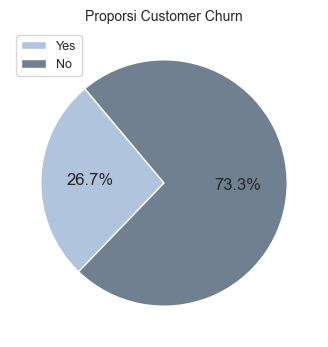

In [147]:
# mengidentifikasi persentase customer yang churn dan tidak churn
plt.figure(figsize=(4, 4))

churn = df[df['Churn'] == 'Yes']
not_churn = df[df['Churn'] == 'No']
percentage_churn = len(churn) / len(df) * 100
percentage_not_churn = len(not_churn) / len(df) * 100

labels = ['Yes', 'No']
sizes = [percentage_churn, percentage_not_churn]
colors = ['lightsteelblue','slategrey']
patches, texts, autotexts = plt.pie(sizes, labels=None, colors=colors, autopct='%1.1f%%', startangle=130)
plt.legend(patches, labels, loc="upper left", fontsize=9)
plt.title('Proporsi Customer Churn', fontsize=10)
plt.show()

> Terdapat 26.7% customer yang churn atau  customer yang beralih ke penyedia layanan lain.

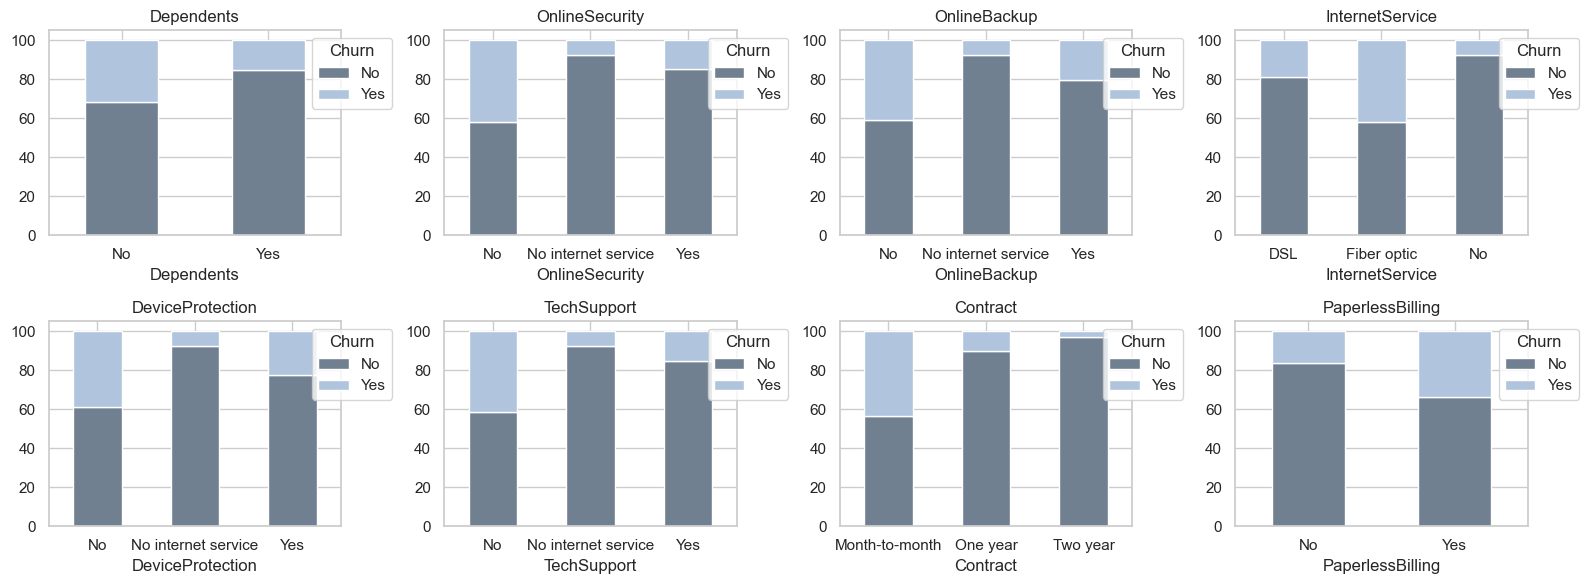

In [148]:
# mengidentifikasi perbandingan customer yang churn pada tiap columns categoric
categorical_columns = ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 6))
colors = ['slategrey', 'lightsteelblue']
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    count_data = df.groupby([column, 'Churn']).size().unstack()
    churn_percentage = (count_data.T / count_data.T.sum()).T * 100
    churn_percentage.plot(kind='bar', stacked=True, ax=axes[i], color=colors)
    axes[i].set_title(f'{column}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0) 
    axes[i].legend(title='Churn', loc='upper right', bbox_to_anchor=(1.2, 1))

plt.tight_layout()
plt.show()

> - Pada column `Dependents` customer yang cenderung melakukan churn, yakni customer yang tidak memiliki tanggungan.
> - Pada column `OnlineSecurity` customer yang cenderung melakukan churn, yakni customer yang tidak menggunakan layanan online security.
> - Pada column `OnlineBackup` customer yang cenderung melakukan churn, yakni customer yang tidak menggunakan layanan online backup.
> - Pada column `InternetService` customer yang cenderung melakukan churn, yakni customer yang menggunakan layanan internet service Fiber Optic dan customer yang tidak churn lebih condong ke layanan DSL.
> - Pada column `DeviceProtection` customer yang cenderung melakukan churn, yakni customer yang tidak menggunakan layanan device protection.
> - Pada column `TechSupport` customer yang cenderung melakukan churn, yakni customer yang tidak menggunakan layanan tech support.
> - Pada column `Contract` customer yang cenderung melakukan churn, yakni customer yang berlanggana dengan durasi per-bulan.
> - Pada column `PaperlessBilling` customer yang cenderung melakukan churn, yakni customer yang menggunakan paperless billing atau lebih memilih menggunakan electrocic bill.

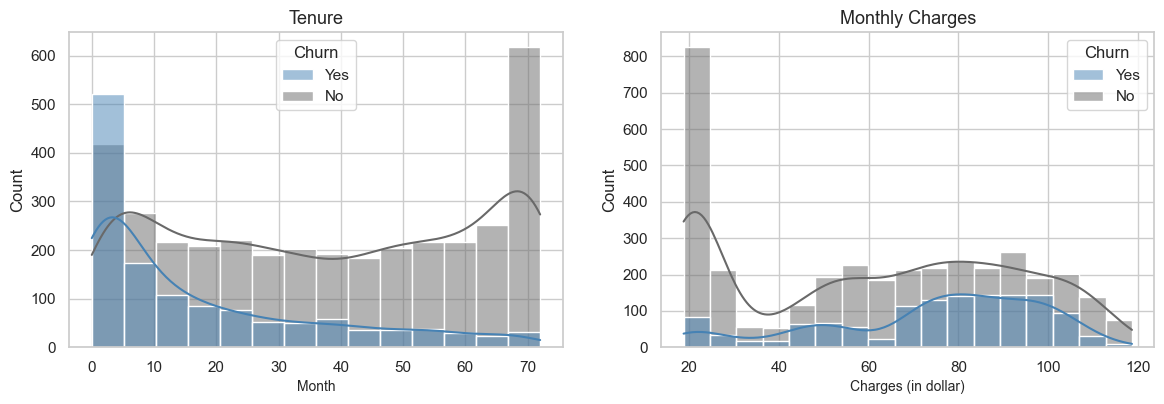

In [149]:
# mengidentifikasi perbandingan customer yang churn pada tiap columns numeric
plt.figure(figsize=(14,9))
colors = ['steelblue', 'dimgrey']

plt.subplot(221)
sns.histplot(data=df,x='tenure',hue='Churn',kde=True, palette=colors)
plt.title('Tenure',fontsize=13)
plt.xlabel('Month', fontsize=10)

plt.subplot(222)
sns.histplot(data=df,x='MonthlyCharges',hue='Churn',kde=True, palette=colors)
plt.title('Monthly Charges',fontsize=13)
plt.xlabel('Charges (in dollar)', fontsize=10)
plt.show()

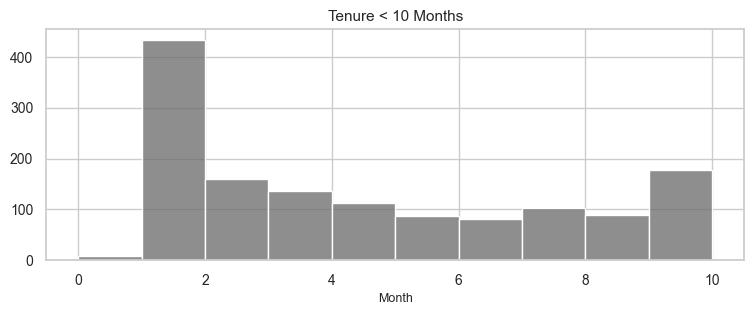

In [150]:
# memvisualisasikan sebaran column tenure dengan memfilter < 10 month untuk melihat frequency bulan dengan tingkat churn terbanyak
plt.figure(figsize=(9, 3))
filtered_tenure = df[df['tenure'] < 11]
sns.histplot(filtered_tenure['tenure'], edgecolor='white', binwidth=1, color='dimgrey')
plt.title('Tenure < 10 Months', fontsize=11)  
plt.xlabel('Month', fontsize=9)
plt.ylabel('', fontsize=11)
plt.tick_params(axis='both', labelsize=10)
plt.show()

> - Pada histogram column `tenure` dapat dilihat bahwa customer yang rentan churn, yakni customer baru yang berlangganan sekitar 1 bulan, kemudian semakin sedikit yang berlangganan setelahnya.
> - Pada histogram column `MonthlyCharges` terlihat pola yang menunjukan bahwa semakin besar biaya bulanan, ternyata membuat customer rentan untuk churn. Customer yang memiliki charges > 60 dollar lebih banyak yang cenderung untuk churn.

## **Data Preprocessing**

**Handling Zero Values**

In [151]:
# mengidentifikasi zero values 
colls = ['tenure']
condition = (df[colls] == 0)
zero_val = df[condition.any(axis=1)]
total_zero_count = len(zero_val)
print(f'Jumlah baris dengan zero values secara keseluruhan: {total_zero_count}')
total_entries = len(df)
zero_percentage = (total_zero_count / total_entries) * 100
print(f'Proporsi zero values secara keseluruhan: {zero_percentage}')

df[df['tenure'] == 0]

Jumlah baris dengan zero values secara keseluruhan: 8
Proporsi zero values secara keseluruhan: 0.16227180527383367


,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
82,Yes,0,No,Yes,DSL,Yes,Yes,Two year,No,73.35,No
325,Yes,0,Yes,No,DSL,Yes,Yes,Two year,Yes,52.55,No
1053,Yes,0,No internet service,No internet service,No,No internet service,No internet service,Two year,No,25.35,No
2017,Yes,0,Yes,Yes,DSL,Yes,No,Two year,No,80.85,No
2902,Yes,0,Yes,Yes,DSL,No,Yes,Two year,Yes,61.90,No
3410,Yes,0,Yes,Yes,DSL,Yes,Yes,Two year,No,56.05,No
4192,Yes,0,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.25,No
4441,Yes,0,No internet service,No internet service,No,No internet service,No internet service,Two year,No,19.85,No


In [152]:
# menghapus zero values
df = df.loc[~(df['tenure'] == 0)].reset_index(drop=True)

> Menghapus zero values pada column `tenure` karena dirasa kontradiktif dengan deskriptif column yang mana diasumsikan merupakan data entry error, sehingga perlu dihapus. Proporsi yang relatif kecil juga dipertimbangkan dalam menghapus zero values dan dianggap tidak akan mempengaruhi informasi secara signifikan atau mempengaruhi kesimpulan yang dapat diambil dari data.

**Identifying Outliers**

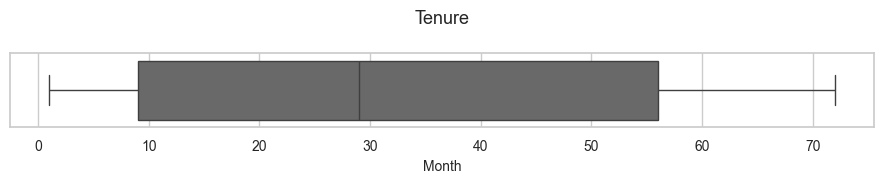

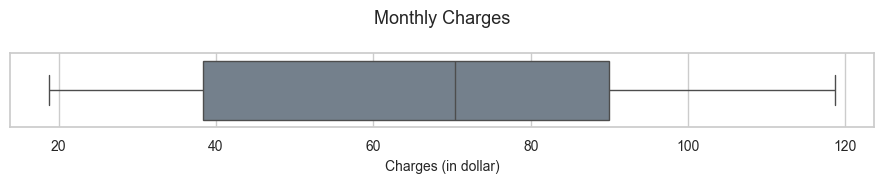

In [153]:
# mengidentifikasi outlier column tenure 
fig, ax = plt.subplots(figsize=(9, 2))
boxplot = sns.boxplot(x=df['tenure'], color='dimgrey')
boxplot.set_title('Tenure\n', fontsize=13)
ax.tick_params(axis='both', labelsize=10)
ax.set_xlabel('Month', fontsize=10)
plt.tight_layout()
plt.show()

# mengidentifikasi outlier column MonthlyCharges	
fig, ax = plt.subplots(figsize=(9, 2))
boxplot = sns.boxplot(x=df['MonthlyCharges'], color='slategrey')
boxplot.set_title('Monthly Charges\n', fontsize=13)
ax.tick_params(axis='both', labelsize=10)
ax.set_xlabel('Charges (in dollar)', fontsize=10)
plt.tight_layout()
plt.show()

> Tidak terindikasi adanya outliers dalam columns `tenure` dan `MonthlyCharges`, sehingga tidak perlu tindakan handling outliers.

**Data Splitting**

In [154]:
# mengubah target variable/column Churn terlebih dahulu menjadi numerik
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Churn'] = label_encoder.fit_transform(df['Churn'])

In [155]:
# proses membagi dataset menjadi train dan validation data
from sklearn.model_selection import train_test_split

X = df.drop('Churn',axis=1)
y = df['Churn']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# feature X_train dan X_val untuk data categorical  
cat_cols = ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling']
X_train_cat = X_train[cat_cols]
X_val_cat = X_val[cat_cols]

# feature X_train dan X_val untuk data numerical
num_cols = ['tenure', 'MonthlyCharges']
X_train_num = X_train[num_cols]
X_val_num = X_val[num_cols]  

> Data splitting dilakukan sebelum proses encoding untuk menghindari data leakage.

**Encoding for Categorical Data**

In [156]:
# memperlihatkan value pada tiap column category
pd.set_option('display.max_colwidth', 1)
colls = ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling']

x = []
for i in colls:
    x.append( [i, df[i].nunique(), df[i].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'], data=x)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Dependents,2,"[Yes, No]"
1,OnlineSecurity,3,"[No, Yes, No internet service]"
2,OnlineBackup,3,"[No, Yes, No internet service]"
3,InternetService,3,"[DSL, Fiber optic, No]"
4,DeviceProtection,3,"[Yes, No internet service, No]"
5,TechSupport,3,"[Yes, No, No internet service]"
6,Contract,3,"[Month-to-month, Two year, One year]"
7,PaperlessBilling,2,"[Yes, No]"


> Dalam case ini data categoric akan di encoding menggunakan dua metode, yakni ordinal encoding dan one-hot encoding.
> - Ordinal encoding: <br/>
>   - Mengubah feature `Contract` dengan menggunakan metode ordinal encoding, karena feature ini mengandung nilai tingkatan/hierarki yang harus disesuaikan. "Month-to-month" menunjukan customer awal dengan durasi pendek, "One year" menunjukan customer dengan durasi yang cukup lama, dan "Two year" menunjukan customer dengan durasi terlama.
> - One-hot enncoding: <br/> 
>   - Mengubah feature dengan menggunakan metode one-hot encoding, karena feature tidak memiliki tingkatan atau urutan yang bermakna dan memiliki jumlah unique value yang sedikit. Berikut, feature-featurenya:
>   - `Dependents`
>   - `OnlineSecurity`
>   - `OnlineBackup`
>   - `InternetService`
>   - `DeviceProtection`
>   - `TechSupport`
>   - `PaperlessBilling`

In [157]:
# proses mapping untuk column Contract
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import category_encoders as ce

contracts = ['Month-to-month', 'Two year', 'One year']

# proses encoding dan transform untuk X_train dan transform untuk X_val
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService', 
                                             'DeviceProtection', 'TechSupport', 'PaperlessBilling']),
    ('ordinal', OrdinalEncoder(categories=[contracts]), ['Contract'])
], remainder='passthrough')

X_train_encoded = transformer.fit_transform(X_train_cat)
X_val_encoded = transformer.transform(X_val_cat)

feature_names = transformer.get_feature_names_out()
feature_names = [name.split('__')[-1] for name in feature_names]

X_train_encoded = pd.DataFrame(X_train_encoded, columns=feature_names)
X_val_encoded = pd.DataFrame(X_val_encoded, columns=feature_names)

X_train_encoded.head()

,Dependents_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,InternetService_Fiber optic,InternetService_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,PaperlessBilling_Yes,Contract
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**Feature Scalling for Numerical Data**

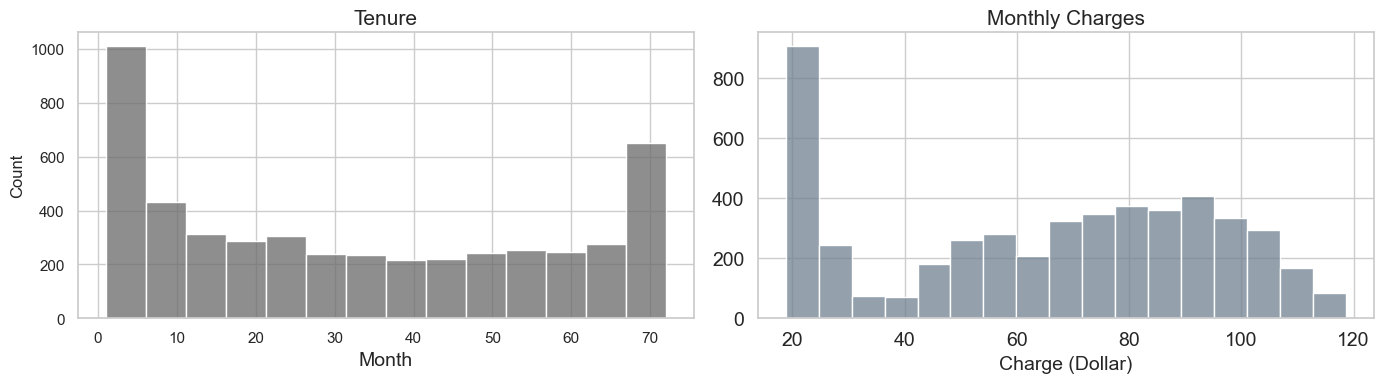

In [158]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

# memvisualisasikan distribusi data column tenure
sns.histplot(df['tenure'], edgecolor='white', color='dimgrey', ax=axes[0])
axes[0].set_title('Tenure', fontsize=15)
axes[0].set_xlabel('Month', fontsize=14)
axes[1].set_ylabel('')
axes[1].tick_params(axis='both', labelsize=14)

# memvisualisasikan distribusi data column MonthlyCharges
sns.histplot(df['MonthlyCharges'], edgecolor='white', color='slategrey', ax=axes[1])
axes[1].set_title('Monthly Charges', fontsize=15)
axes[1].set_xlabel('Charge (Dollar)', fontsize=14)
axes[1].set_ylabel('')
axes[1].tick_params(axis='both', labelsize=14)

plt.tight_layout()
plt.show()

In [159]:
# uji normaslitas columns tenure dan MonthlyCharges
from scipy.stats import kstest

stat_tenure, p_value_tenure = kstest(df['tenure'], 'norm')
print('tenure:')
print('KS Statistic:', stat_tenure)
print('P-value:', p_value_tenure)
if p_value_tenure > 0.05:
    print('Data terdistribusi normal (tidak dapat menolak H0)')
else:
    print('Data tidak terdistribusi normal (menolak H0)')

stat_charges, p_value_charges = kstest(df['MonthlyCharges'], 'norm')
print('\nMonthlyCharges:')
print('KS Statistic:', stat_charges)
print('P-value:', p_value_charges)
if p_value_charges > 0.05:
    print('Data terdistribusi normal (tidak dapat menolak H0)')
else:
    print('Data tidak terdistribusi normal (menolak H0)')

tenure:
KS Statistic: 0.8892774990961118
P-value: 0.0
Data tidak terdistribusi normal (menolak H0)

MonthlyCharges:
KS Statistic: 1.0
P-value: 0.0
Data tidak terdistribusi normal (menolak H0)


> - Feature numeric (`tenure` dan `MonthlyCharges`) memiliki range yang berbeda, untuk itu perlu dilakukan feature  scalling untuk membantu model bekerja lebih baik dan menghasilkan hasil yang lebih konsisten. 
> - Dalam case ini akan digunakan MinMax Scaller karena data numeric tidak terdistirbusi normal.

In [160]:
# proses Feature  scalling
from sklearn.preprocessing import MinMaxScaler

numeric_columns = ['tenure', 'MonthlyCharges']
scaler = MinMaxScaler()
X_train_scalled = scaler.fit_transform(X_train_num)
X_val_scalled = scaler.transform(X_val_num)

X_train_scalled = pd.DataFrame(X_train_scalled, columns=numeric_columns)
X_val_scalled = pd.DataFrame(X_val_scalled, columns=numeric_columns)

X_train_scalled.head()

,tenure,MonthlyCharges
0,0.098592,0.258888
1,0.633803,0.014021
2,0.408451,0.502253
3,0.000000,0.321482
4,0.197183,0.672008


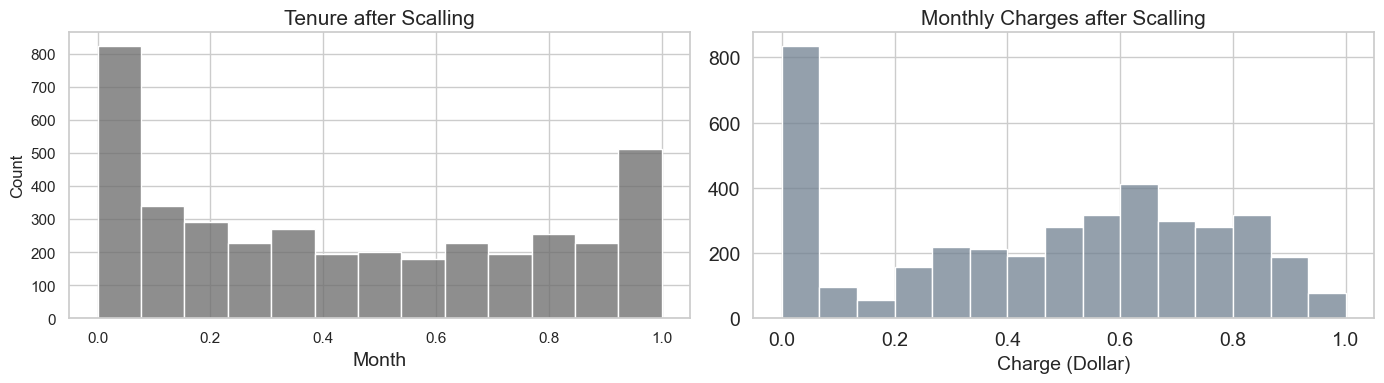

In [161]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

# memvisualisasikan distribusi data column tenure setelah di scalling
sns.histplot(X_train_scalled['tenure'], edgecolor='white', color='dimgrey', ax=axes[0])
axes[0].set_title('Tenure after Scalling', fontsize=15)
axes[0].set_xlabel('Month', fontsize=14)
axes[1].set_ylabel('')
axes[1].tick_params(axis='both', labelsize=14)

# memvisualisasikan distribusi data column MonthlyCharges setelah di scalling
sns.histplot(X_train_scalled['MonthlyCharges'], edgecolor='white', color='slategrey', ax=axes[1])
axes[1].set_title('Monthly Charges after Scalling', fontsize=15)
axes[1].set_xlabel('Charge (Dollar)', fontsize=14)
axes[1].set_ylabel('')
axes[1].tick_params(axis='both', labelsize=14)

plt.tight_layout()
plt.show()

> Range dari feature `tenure` dan `MonthlyCharges` terlihat sudah memiliki range yang sama, yakni antara 0 dan 1.

**Feature Correlation**

Categorical Data

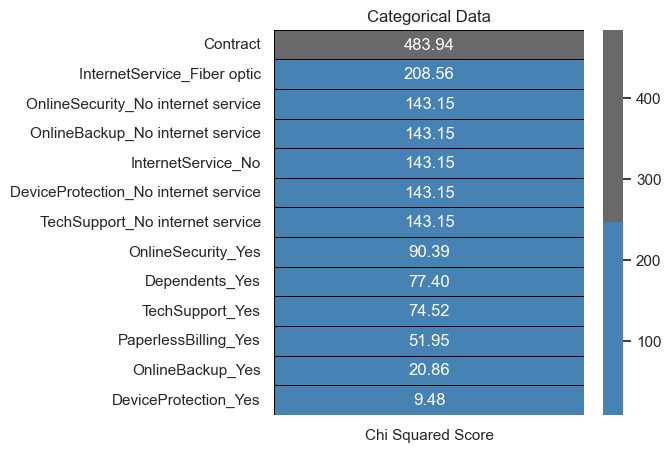

In [162]:
# mengidentifikasi score hubungan antara tiap feature dengan label target
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif

best_features = SelectKBest(score_func = chi2, k= 'all' )
fit = best_features.fit(X_train_encoded, y_train)

featureScores = pd.DataFrame(data = fit.scores_, index = X_train_encoded.columns, columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False, by = 'Chi Squared Score'), annot = True, cmap = colors,
            linewidths = 0.4, linecolor = 'black', fmt = '.2f');
plt.title('Categorical Data')
plt.show()

> - Metode yang digunakan untuk feature selection tipe categoric dalam tahap ini menggunakan metode Chi-Squared Test, untuk melihat hubungan antara feature dengan target, yang mana dalam case ini adalah label Churn.
> - Feature `DeviceProtection_Yes` memiliki score yang paling kecil, menunjukan feature tersebut kurang relevan untuk memprediksi target label, namun feature tersebut dapat memberikan inisght mengenai preferensi pelanggan mengneai layanan Device Protection, sehingga akan dipertahankan.

Numerical Data

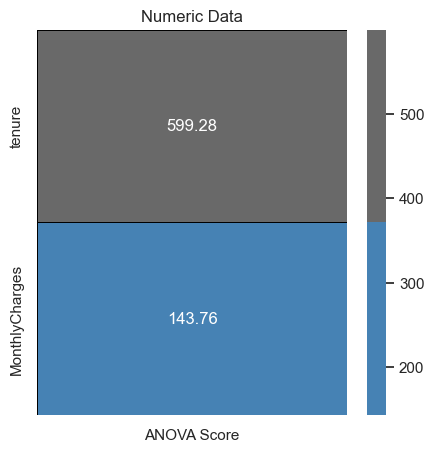

In [163]:
from sklearn.feature_selection import f_classif

best_features = SelectKBest(score_func = f_classif, k= 'all' )
fit = best_features.fit(X_train_scalled, y_train)

featureScores = pd.DataFrame(data = fit.scores_, index = X_train_scalled.columns, columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False, by = 'ANOVA Score'), annot = True, cmap = colors,
            linewidths = 0.4, linecolor = 'black', fmt = '.2f');
plt.title('Numeric Data')
plt.show()

> Kedua feature numerical memiliki nilai F yang dirasa cukup tinggi, menandakan adanya relevansi antara feature dengan target label. Sehingga, kedua feature ini akan dipertahankan.

**Merging Categorical Data with Numeric Data**

In [164]:
# proses merging antara  X_train_encoded, X_val_encoded dengan X_train_scalled, X_val_scalled
X_train_final = pd.concat([X_train_encoded, X_train_scalled], axis=1)
X_val_final = pd.concat([X_val_encoded, X_val_scalled], axis=1)

X_train_final.head()

,Dependents_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,InternetService_Fiber optic,InternetService_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,PaperlessBilling_Yes,Contract,tenure,MonthlyCharges
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.098592,0.258888
1,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.633803,0.014021
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.408451,0.502253
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.321482
4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.197183,0.672008


**Handling Imbalance Data**

In [165]:
# menghitung imbalance ratio
churn_counts = df['Churn'].value_counts()
ratio = churn_counts[0] / churn_counts[1]
print(f'Imbalance ratio: {ratio}')

Imbalance ratio: 2.7401215805471124


> - Rasio di atas menunjukkan bahwa kelas mayoritas (tidak churn) memiliki sekitar 2.75 kali lipat sampel lebih banyak dibandingkan dengan kelas minoritas (churn). Jadi, dapat dikatakan bahwa data memiliki tingkat ketidakseimbangan yang cukup signifikan, sehingga perlu dilakukan handling imbalance data.
> - Dalam case ini akan dibandingkan dua metode handling imbalance data menggunakan metode Random Over-Sampler dan SMOTEEN.

In [166]:
# import library yang digunakan untuk modeling dan evaluasi
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score

In [167]:
# pengaplikasian Random Over-Sampler 
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy=1, random_state=42)

classifiers = {
    'LightGBM': lgb.LGBMClassifier(verbosity=-1),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': xgb.XGBClassifier(),
    'SVC': SVC(random_state=42, verbose=0),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scorer = 'roc_auc'
cv_scores_dict = {}
print('Random Over-Sampling')

for name, classifier in classifiers.items():
    print(f"\n{name}:")
    
    pipeline = Pipeline([
        ('ros', ros),
        ('classifier', classifier)  
    ])
    cv_scores = cross_val_score(pipeline, X_train_final, y_train, cv=skfold, scoring=scorer)
    cv_scores_dict[name] = cv_scores
    print(f'ROC AUC scores: {cv_scores}')
    print(f'ROC AUC score mean: {cv_scores.mean():.4f}')


Random Over-Sampling

LightGBM:


ROC AUC scores: [0.80237295 0.83704732 0.79988859 0.82357432 0.8344112 ]
ROC AUC score mean: 0.8195

K-Nearest Neighbors:
ROC AUC scores: [0.74327499 0.75356682 0.72436659 0.77144095 0.77779835]
ROC AUC score mean: 0.7541

XGBoost:
ROC AUC scores: [0.78807691 0.81805712 0.78256994 0.80510853 0.82408093]
ROC AUC score mean: 0.8036

SVC:
ROC AUC scores: [0.80515742 0.8349446  0.79780061 0.82971858 0.83093487]
ROC AUC score mean: 0.8197

Random Forest:
ROC AUC scores: [0.7752881  0.81647186 0.77491541 0.78675827 0.81948558]
ROC AUC score mean: 0.7946

Gradient Boosting:
ROC AUC scores: [0.82381085 0.85822649 0.81885368 0.83743914 0.84415729]
ROC AUC score mean: 0.8365


In [168]:
# pengaplikasian SMOTEEM
from imblearn.over_sampling import SMOTE

smoteenn = SMOTE(random_state=42)

classifiers = {
    'LightGBM': lgb.LGBMClassifier(verbosity=-1),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': xgb.XGBClassifier(),
    'SVC': SVC(random_state=42,verbose=0),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scorer = 'roc_auc'
cv_scores_dict = {}
print('SMOTE')

for name, classifier in classifiers.items():
    print(f"\n{name}:")
    
    pipeline = Pipeline([
        ('smoteenn', smoteenn),
        ('classifier', classifier)  
    ])
    cv_scores = cross_val_score(pipeline, X_train_final, y_train, cv=skfold, scoring=scorer)
    cv_scores_dict[name] = cv_scores
    print(f'ROC AUC scores: {cv_scores}')
    print(f'ROC AUC score mean: {cv_scores.mean():.4f}')


SMOTE

LightGBM:
ROC AUC scores: [0.81352723 0.83425464 0.79775935 0.82216308 0.83694132]
ROC AUC score mean: 0.8209

K-Nearest Neighbors:
ROC AUC scores: [0.75460586 0.7683598  0.73530577 0.78024676 0.79801458]
ROC AUC score mean: 0.7673

XGBoost:
ROC AUC scores: [0.79989651 0.82569591 0.77483288 0.82241066 0.82135334]
ROC AUC score mean: 0.8088

SVC:
ROC AUC scores: [0.79961313 0.82999992 0.79761905 0.82850541 0.82640123]
ROC AUC score mean: 0.8164

Random Forest:
ROC AUC scores: [0.78606865 0.82146583 0.78202938 0.79692168 0.80890436]
ROC AUC score mean: 0.7991

Gradient Boosting:
ROC AUC scores: [0.82609428 0.85599645 0.81667492 0.83902369 0.84544497]
ROC AUC score mean: 0.8366


> Score ROC AUC antara metode handling imbalance data dengan metode Random Over-Sampling dan SMOTE tidak terlalu memiliki perbedaan yang signifikan, namun metode SMOTE memiliki score yang tertinggi dan lebih konsisten. Oleh karena itu, untuk proses selanjutnya akan menggunakan data dengan pengaplikasian SMOTE.

In [169]:
# check jumlah data sebelum dan sesudah di-resample
resample = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = resample.fit_resample(X_train_final, y_train)

print(f'Sebelum di resample: {y_train.value_counts()}\n') 
print(f'Sesudah di resample: {y_train_resampled.value_counts()}')

Sebelum di resample: Churn
0    2884
1    1053
Name: count, dtype: int64

Sesudah di resample: Churn
0    2884
1    2884
Name: count, dtype: int64


## **Modeling**

**Choosing Baseline Model**

In [170]:
# benchmark model yang akan digunakan
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lgbm = lgb.LGBMClassifier(verbosity=-1, random_state=42)
knn = KNeighborsClassifier()
xgb = xgb.XGBClassifier(random_state=42)
svc = SVC(verbose=0, random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

In [171]:
models = [lgbm, knn, xgb, svc, rf, gb]

# proses training tanpa resample
score = []
roc_auc = []
f1 = []
recall = []
precision = []

for model in models:
    skfold = StratifiedKFold(n_splits=5)
    estimator = Pipeline([
        ('model', model)])
    model_cv = cross_val_score(estimator, X_train_final, y_train, cv=skfold, scoring='roc_auc')
    score.append(model_cv)
    roc_auc.append(model_cv.mean())
    f1_model_cv = cross_val_score(estimator, X_train_final, y_train, cv=skfold, scoring='f1')
    f1.append(f1_model_cv.mean())
    recall_model_cv = cross_val_score(estimator, X_train_final, y_train, cv=skfold, scoring='recall')
    recall.append(recall_model_cv.mean())
    precision_model_cv = cross_val_score(estimator, X_train_final, y_train, cv=skfold, scoring='precision')
    precision.append(precision_model_cv.mean())

results = pd.DataFrame({'Model': ['LightGBM', 'KNN', 'XGBoost', 'SVC', 'Random Forest', 'Gradient Boost'],
                        'ROC AUC': roc_auc,
                        'F1': f1,
                        'Recall': recall,
                        'Precision': precision}).set_index('Model')

print('Training score tanpa resample:')
display(results)


# proses training dengan data yang sudah di-resample
score_resampled = []
roc_auc_resampled = []
f1_resampled = []
recall_resampled = []
precision_resampled = []

for model in models:
    skfold = StratifiedKFold(n_splits=5)
    estimator = Pipeline([
        ('model', model)])
    model_cv = cross_val_score(estimator, X_train_resampled, y_train_resampled, cv=skfold, scoring='roc_auc')
    score_resampled.append(model_cv)
    roc_auc_resampled.append(model_cv.mean())
    f1_model_cv = cross_val_score(estimator, X_train_resampled, y_train_resampled, cv=skfold, scoring='f1')
    f1_resampled.append(f1_model_cv.mean())
    recall_model_cv = cross_val_score(estimator, X_train_resampled, y_train_resampled, cv=skfold, scoring='recall')
    recall_resampled.append(recall_model_cv.mean())
    precision_model_cv = cross_val_score(estimator, X_train_resampled, y_train_resampled, cv=skfold, scoring='precision')
    precision_resampled.append(precision_model_cv.mean())

results_resampled = pd.DataFrame({'Model': ['LightGBM', 'KNN', 'XGBoost', 'SVC', 'Random Forest', 'Gradient Boost'],
                        'ROC AUC': roc_auc_resampled,
                        'F1': f1_resampled,
                        'Recall': recall_resampled,
                        'Precision': precision_resampled}).set_index('Model')

print('Training score dengan resample:')
display(results_resampled)

Training score tanpa resample:


,ROC AUC,F1,Recall,Precision
Model,,,,
LightGBM,0.819580,0.546775,0.500537,0.603216
KNN,0.773544,0.527105,0.485285,0.576982
XGBoost,0.808423,0.549867,0.512882,0.592891
SVC,0.793939,0.521265,0.445425,0.628685
Random Forest,0.798372,0.520853,0.468255,0.587410
Gradient Boost,0.836359,0.575883,0.520447,0.644881


Training score dengan resample:


,ROC AUC,F1,Recall,Precision
Model,,,,
LightGBM,0.897226,0.816863,0.840173,0.798766
KNN,0.852721,0.790077,0.836339,0.748776
XGBoost,0.899988,0.818151,0.838100,0.804253
SVC,0.839934,0.773267,0.812060,0.738714
Random Forest,0.899994,0.826209,0.841913,0.813540
Gradient Boost,0.879509,0.801313,0.830807,0.775603


> Setelah resampling dengan metode SMOTE sebagian besar score ROC AUC, F1, Recall, dan Precision pada tiap model mengalami peningkatan score. Oleh karena itu, untuk proses selanjutnya akan menggunakan data yang di-resample.

**Model Baseline: Test Validation Data**

In [172]:
# test validation model dengan data yang sudah di-resample
models = [lgbm, knn, xgb, svc, rf, gb]

predictions = []
prob_predictions = []  

for model in models:
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_val_final)
    predictions.append(y_pred)
   
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_val_final)[:, 1]
        prob_predictions.append(y_pred_prob)

score_val = []
roc_auc_val = []
f1_val = []
recall_val = []
precision_val = []

for idx, y_pred in enumerate(predictions):
    if idx < len(prob_predictions):
        roc_auc_val.append(roc_auc_score(y_val, prob_predictions[idx]))
    else:
        roc_auc_val.append(roc_auc_score(y_val, y_pred))
        
    f1_val.append(f1_score(y_val, y_pred))
    recall_val.append(recall_score(y_val, y_pred))
    precision_val.append(precision_score(y_val, y_pred))

results = pd.DataFrame({'Model': ['LightGBM', 'KNN', 'XGBoost', 'SVC', 'Random Forest', 'Gradient Boost'],
                        'ROC AUC': roc_auc_val,
                        'F1': f1_val,
                        'Recall': recall_val,
                        'Precision': precision_val}).set_index('Model')

print('Test validation score dengan resample data:')
display(results)


Test validation score dengan resample data:


,ROC AUC,F1,Recall,Precision
Model,,,,
LightGBM,0.846597,0.637931,0.703422,0.583596
KNN,0.782838,0.570543,0.699620,0.481675
XGBoost,0.834301,0.615929,0.661597,0.576159
SVC,0.823578,0.640986,0.790875,0.538860
Random Forest,0.858921,0.566728,0.589354,0.545775
Gradient Boost,0.766139,0.637821,0.756654,0.551247


> Model KNN dan Gradient Boost memiliki score paling rendah, baik dengan resample dan tanpa resample, jadi untuk proses selanjutnya hanya akan menggunakan model `XGBoost`, `Random Forest`, `LightGBM`, dan `SVC`. 

**Hyperparameter Tuning** <br/>
Tahap ini merupakan proses untuk menemukan kombinasi parameter terbaik bagi tiap model.

Training Score

In [173]:
models = [xgb, rf, lgbm, svc]

# training tanpa hyperparameter tuning
score_resampled = []
roc_auc_resampled = []
f1_resampled = []
recall_resampled = []
precision_resampled = []

for model in models:
    skfold = StratifiedKFold(n_splits=5) 
    estimator = Pipeline([
        ('model', model)])
    model_cv = cross_val_score(estimator, X_train_resampled, y_train_resampled, cv=skfold, scoring='roc_auc')
    score_resampled.append(model_cv)
    roc_auc_resampled.append(model_cv.mean())
    f1_model_cv = cross_val_score(estimator, X_train_resampled, y_train_resampled, cv=skfold, scoring='f1')
    f1_resampled.append(f1_model_cv.mean())
    recall_model_cv = cross_val_score(estimator, X_train_resampled, y_train_resampled, cv=skfold, scoring='recall')
    recall_resampled.append(recall_model_cv.mean())
    precision_model_cv = cross_val_score(estimator, X_train_resampled, y_train_resampled, cv=skfold, scoring='precision')
    precision_resampled.append(precision_model_cv.mean())

results_ = pd.DataFrame({'Model': ['XGBoost', 'Random Forest', 'LightGBM', 'SVC'],
                        'ROC AUC': roc_auc_resampled,
                        'F1': f1_resampled,
                        'Recall': recall_resampled,
                        'Precision': precision_resampled}).set_index('Model')

print('Training score tanpa Hyperparameter Tuning:')
display(results_)

# training dengan hyperparameter tuning
# menentukan parameter yang terbaike
xgb_best = xgb.set_params(**{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 80})
rf_best = rf.set_params(**{'max_depth': 7, 'n_estimators': 80})
lgbm_best = lgbm.set_params(**{'learning_rate': 0.1, 'objective': 'binary', 'num_leaves': 15, 'n_estimators': 50})
svc_best = svc.set_params(**{'C': 1, 'kernel': 'rbf', 'probability': True})

xgb_best.fit(X_train_resampled, y_train_resampled)
rf_best.fit(X_train_resampled, y_train_resampled)
lgbm_best.fit(X_train_resampled, y_train_resampled)
svc_best.fit(X_train_resampled, y_train_resampled)

models = [xgb_best, rf_best, lgbm_best, svc_best]

model_names = ['XGBoost', 'Random Forest', 'LightGBM', 'SVC']
metrics = {'ROC AUC': [], 'F1': [], 'Recall': [], 'Precision': []}

for model, name in zip(models, model_names):
    if hasattr(model, 'predict_proba'):
        y_pred_proba_train = model.predict_proba(X_train_resampled)[:, 1]
        y_pred_train = (y_pred_proba_train >= 0.5).astype(int)
    else:
        y_pred_train = model.predict(X_train_resampled)

    metrics['ROC AUC'].append(roc_auc_score(y_train_resampled, y_pred_proba_train))
    metrics['F1'].append(f1_score(y_train_resampled, y_pred_train))
    metrics['Recall'].append(recall_score(y_train_resampled, y_pred_train))
    metrics['Precision'].append(precision_score(y_train_resampled, y_pred_train))

results = pd.DataFrame({'Model': ['XGBoost', 'Random Forest', 'LightGBM', 'SVC'],
                        'ROC AUC': metrics['ROC AUC'],
                        'F1': metrics['F1'],
                        'Recall': metrics['Recall'],
                        'Precision': metrics['Precision']}).set_index('Model')

print('Training score dengan Hyperparameter Tuning:')
display(results)

Training score tanpa Hyperparameter Tuning:


,ROC AUC,F1,Recall,Precision
Model,,,,
XGBoost,0.899988,0.818151,0.838100,0.804253
Random Forest,0.899994,0.826209,0.841913,0.813540
LightGBM,0.897226,0.816863,0.840173,0.798766
SVC,0.839934,0.773267,0.812060,0.738714


Training score dengan Hyperparameter Tuning:


,ROC AUC,F1,Recall,Precision
Model,,,,
XGBoost,0.889884,0.817023,0.855409,0.781933
Random Forest,0.890979,0.825688,0.873786,0.782609
LightGBM,0.907051,0.831663,0.863384,0.802191
SVC,0.855802,0.780685,0.801664,0.760777


> - Berikut adalah parameter yang digunakan untuk Hyperparameter Tuning:
>   - `XGBoost`         : learning_rate  = 0.1, max_depth = 3, n_estimators = 80
>   - `Random Forest`   : max_depth = 7, n_estimators = 80
>   - `LightGBM`        : learning_rate = 0.1, num_leaves = 15, n_estimators = 50, objective = binary
>   - `SVC`             : C = 1, kernel = rbf, probability = True
> - Setelah dilakukan Hyperparameter Tuning dapat terlihat peningkatan score ROC AUC untuk beberapa model saja, namun tiap model mengalami peningkatan pada score Recall. Oleh karena itu, untuk proses selanjutnya akan menggunakan parameter yang sudah di-tuning.

Test Validation Score

In [174]:
# test validation score model dengan hyperparameter tuning
models = [xgb_best, rf_best, lgbm_best, svc_best]

model_names = ['XGBoost', 'Random Forest', 'LightGBM', 'SVC']
metrics = {'ROC AUC': [], 'F1': [], 'Recall': [], 'Precision': []}

for model, name in zip(models, model_names):
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_val_final)[:, 1]
        y_pred = (y_pred_proba >= 0.5).astype(int)
    else:
        y_pred = model.predict(X_val_final)

    metrics['ROC AUC'].append(roc_auc_score(y_val, y_pred_proba))
    metrics['F1'].append(f1_score(y_val, y_pred))
    metrics['Recall'].append(recall_score(y_val, y_pred))
    metrics['Precision'].append(precision_score(y_val, y_pred))

results = pd.DataFrame({'Model': ['XGBoost', 'Random Forest', 'LightGBM', 'SVC'],
                        'ROC AUC': metrics['ROC AUC'],
                        'F1': metrics['F1'],
                        'Recall': metrics['Recall'],
                        'Precision': metrics['Precision']}).set_index('Model')

print('Test validation data dengan Hyperparameter Tuning:')
display(results)

Test validation data dengan Hyperparameter Tuning:


,ROC AUC,F1,Recall,Precision
Model,,,,
XGBoost,0.854033,0.628125,0.764259,0.533156
Random Forest,0.858439,0.647504,0.813688,0.537688
LightGBM,0.854800,0.630719,0.733840,0.553009
SVC,0.845547,0.637636,0.779468,0.539474


**Voting Classifier Experiment** <br/>
Tahap ini merupakan proses experiment untuk tahu apakah model setelah dilakukan ensemble menghasilkan score/kinerja yang lebih baik atau tidak.

In [175]:
# test validation score voting classifier
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(
    estimators=[
        ('xgb', xgb_best),
        ('rf', rf_best),
        ('lgbm', lgbm_best),
        ('svc', svc_best)], 
    voting='soft')

# training score
vc.fit(X_train_resampled, y_train_resampled)

y_pred_proba = vc.predict_proba(X_train_resampled)[:, 1]
y_pred = (y_pred_proba >= 0.5).astype(int)

roc_auc_train = roc_auc_score(y_train_resampled, y_pred_proba)
f1_train = f1_score(y_train_resampled, y_pred)
recall_train = recall_score(y_train_resampled, y_pred)
precision_train = precision_score(y_train_resampled, y_pred)

results = pd.DataFrame({'Model': ['Voting Classifier'],
                        'ROC AUC': [roc_auc_train], 
                        'F1': [f1_train],
                        'Recall': [recall_train],
                        'Precision': [precision_train]}).set_index('Model')

print('Training score dengan Voting Classifier:')
display(results)

# test validation score
vc.fit(X_train_resampled, y_train_resampled)

y_pred_proba = vc.predict_proba(X_val_final)[:, 1]
y_pred = (y_pred_proba >= 0.5).astype(int)

roc_auc = roc_auc_score(y_val, y_pred_proba)
f1 = f1_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)

results = pd.DataFrame({'Model': ['Voting Classifier'],
                        'ROC AUC': [roc_auc], 
                        'F1': [f1],
                        'Recall': [recall],
                        'Precision': [precision]}).set_index('Model')

print('\nTest validation score dengan Voting Classifier:')
display(results)

Training score dengan Voting Classifier:


,ROC AUC,F1,Recall,Precision
Model,,,,
Voting Classifier,0.893685,0.820108,0.865465,0.779269



Test validation score dengan Voting Classifier:


,ROC AUC,F1,Recall,Precision
Model,,,,
Voting Classifier,0.859708,0.643077,0.794677,0.540052


> Ternyata setelah dilakukan metode ensamble dengan metode Voting Classifier terjadi peningkatan pada score ROC AUC jika dibandingkan dengan model Random Forest (Model dengan score tertinggi sebelum dilakukan ensamble) walaupun kecil. Oleh karena itu, model Voting Classifier dengan estimator model `XGBoost`, `Random Forest`, `LightGBM`, dan `SVC` menggunakan soft voting akan digunakan sebagai model akhir.

              precision    recall  f1-score   support

           0       0.91      0.75      0.82       722
           1       0.54      0.79      0.64       263

    accuracy                           0.76       985
   macro avg       0.72      0.77      0.73       985
weighted avg       0.81      0.76      0.78       985



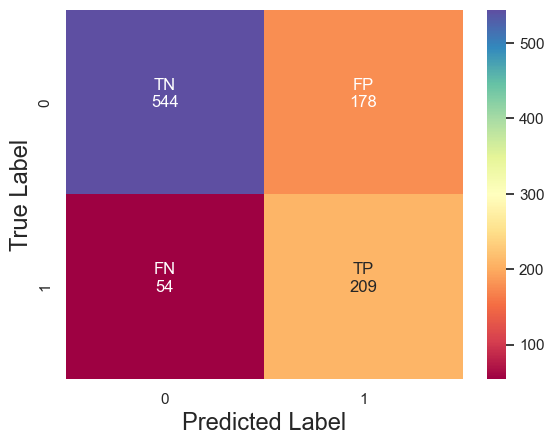

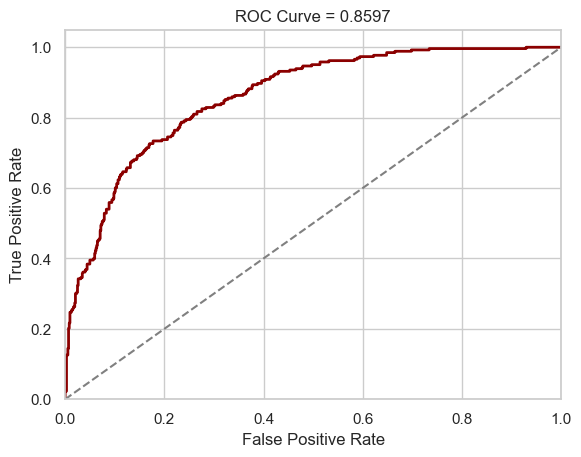

In [176]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics import RocCurveDisplay

# classification report dan visualisasi confusion matrix model ensamble
print(classification_report(y_val, vc.predict(X_val_final)))

cm = confusion_matrix(y_val, vc.predict(X_val_final))
names = ['TN','FP','FN','TP']
counts = [value for value in cm.flatten()]
labels = [f'{v1}\n{v2}\n' for v1, v2 in zip(names,counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, cmap='Spectral', fmt='')
plt.xlabel('Predicted Label', fontsize=17)
plt.ylabel('True Label', fontsize=17)
plt.show()

# ploting ROC AUC curve model ensamble
y_pred_proba = vc.predict_proba(X_val_final)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkred', lw=2, label='ROC curve (AUC = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve = {roc_auc:.4f}')
plt.show()

**Probability Threshold Tuning** <br/>
Karena di awal sudah ditentukan tujuan utama dalam case ini adalah untuk meminimalkan kehilangan customer (False Negative), untuk itu proses probability threshold tuning akan fokus untuk menghasilkan score Recall yang tinggi, agar  meminimalkan kehilangan customer yang tidak terdeteksi.

              precision    recall  f1-score   support

           0       0.96      0.50      0.66       722
           1       0.41      0.95      0.57       263

    accuracy                           0.62       985
   macro avg       0.69      0.72      0.61       985
weighted avg       0.82      0.62      0.63       985



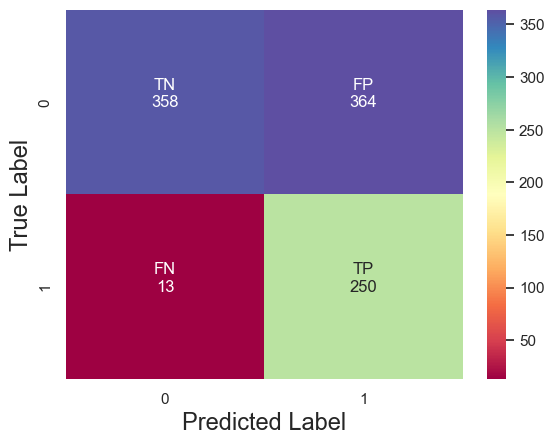

In [177]:
# proses tuning threshold
vc_best = VotingClassifier(
    estimators=[
        ('xgb', xgb_best),
        ('rf', rf_best),
        ('lgbm', lgbm_best),
        ('svc', svc_best)
    ],
    voting='soft'  
)

vc_best.fit(X_train_resampled, y_train_resampled)

y_pred_proba = vc_best.predict_proba(X_val_final)[:, 1]
y_pred = (y_pred_proba >= 0.2).astype(int)

print(classification_report(y_val, y_pred))

cm = confusion_matrix(y_val, y_pred)
names = ['TN','FP','FN','TP']
counts = [value for value in cm.flatten()]
labels = [f'{v1}\n{v2}\n' for v1, v2 in zip(names,counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, cmap='Spectral', fmt='')
plt.xlabel('Predicted Label', fontsize=17)
plt.ylabel('True Label', fontsize=17)
plt.show()

> Setelah dilakukan probability threshold tuning, terjadi perubahan score yang signifikan antara classification report dan confusion matrix.

**Cara Kerja Algoritma Modal Akhir**

Model akhir merupakan Voting Classifier, yakni gabungan dari beberapa model sebagai estimator yang terdiri dari model XGBoost, Random Forest, LightGBM, dan Support Vector Classifier yang sebelumnya telah melalui hyperparameter tuning.

Metode voting yang digunakan adalah "soft" yang mana memberikan prediksi probabilitasnya untuk setiap kelas. Kemudian, prediksi probabilitas dari setiap estimator dinormalisasi dan diberi bobot. Bobot ini dapat ditentukan berdasarkan confidence score masing-masing model. Prediksi akhir adalah hasil dari penggabungan prediksi probabilitas dari masing-masing estimator, di mana bobot masing-masing estimator mempengaruhi score akhir. 

Threshold 0.2 dipilih untuk mengklasifikasikan hasil prediksi probabilitas menjadi kelas biner (0 atau 1). Artinya, jika probabilitas prediksi lebih besar dari atau sama dengan 0.2, maka hasilnya akan dianggap sebagai kelas 1 (churn), dan jika kurang dari 0.2, maka hasilnya akan dianggap sebagai kelas 0 (tidak churn). Pemilihan theshold ini dilakukan berdasarkan uji threshold berkali-kali sampai menemukan pilihan yang sesuai untuk mendapatkan score yang sesuai dengan business problem/goals yang telah ditentukan di awal (meminimalkan FN/meningkatkan score Recall).

**Shapley Additive Explanations (SHAP)**

PermutationExplainer explainer: 986it [4:03:27, 14.84s/it]                           


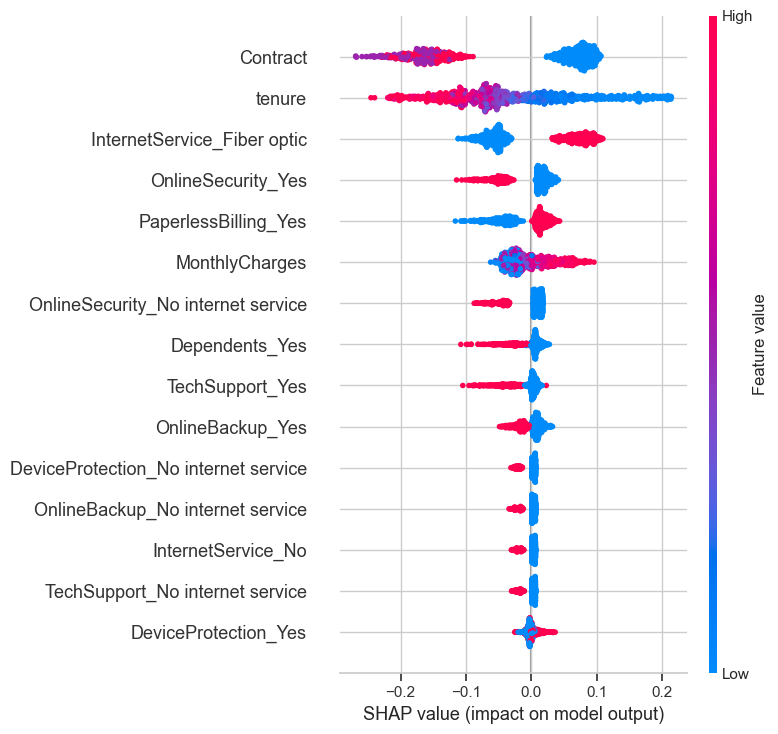

In [ ]:
# # visualisasi SHAP
import shap

explainer = shap.Explainer(vc_best.predict_proba, X_train_resampled)
shap_values = explainer(X_val_final)
shap.summary_plot(shap_values[:, :, 1], X_val_final, plot_type="dot", show=False)

> Interpretasi SHAP:
>   - `tenure` : Customer yang sudah berlangganan cukup lama, kecil kemungkinan untuk churn.
>   - `Contract` : Semakin kecil durasi contract, semakin besar peluang customer untuk churn.
>   - `MonthlyCharges` : Semakin besar charges, semakin besar peluang customer untuk churn.
>   - `InternetService_Fiber optic` : Customer yang memilih layanan Fiber Optic berpeluang besar untuk churn.
>   - `OnlineSecurity_Yes` : Customer yang memilih layanan Online Security memiliki peluang  kecil untuk churn.
>   - `PaperlessBilling_Yes` : Customer yang memilih layanan paperless billing, cenderung besar untuk churn.
>   - `TechSupport_Yes` : Customer yang memilih layanan Tech Support berpeluang kecil untuk churn.
>   - `OnlineSecurity_No internet service` : Customer yang tidak memilih layanan Internet Service berpeluang kecil untuk churn.
>   - `Dependents_Yes` : Customer yang tidak memiliki tanggungan berpeluang kecil untuk churn.
>   - `OnlineBackup_Yes` : Customer yang memilih layanan Online Backup berpeluang kecil untuk churn.
>   - `DeviceProtection_No internet service` : Customer yang tidak memilih layanan No Internet Service untuk Device Protection, berpeluang kecil untuk churn.
>   - `InternetService_No` : Customer yang tidak memilih layanan Internet Service berpeluang kecil untuk churn.
>   - `OnlineBackup_No internet service` : Customer yang memilih layanan No Internet Service untuk layanan Online Backup, berpeluang kecil untuk churn.
>   - `TechSupport_No internet service` : Cutomer yang memilih layanan No Internet Service untuk layanan Tech Support, berpeluang kecil untuk churn.
>   - `DeviceProtection_Yes` : Customer yang memilih layanan Device Protection, berpeluang besar untuk churn.
>
> Berdasarkan pemodelan yang telah dilakukan feature `tenure`, `Contract`, dan `MonthlyCharges` merupakan feature-feature yang sangat berpengaruh.

## **Conclusion**

Berdasarkan hasil classification report dari model akhir pilihan (Voting Classifier), dapat dikatakan bahwa model mampu memprediksi customer yang benar-benar churn sebesar **95%** (Recall) dan mampu memprediksi customer yang churn dari keseluruhan kelas positive yang ada sebesar **41%** (Precision). 

**Model Limitation** <br/>
Model ini memiliki batasan mengenai rentang data yang digunakan. Berikut batasan-batasannya:
- Feature `Dependents` dan `PaperlessBilling` memiliki unique value "Yes" dan "No".
- Feature `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, dan `TechSupport` memiliki unique value "No", "Yes", dan "No internet service".
- Feature `Contract` memiliki unique value "Month-to-month", "Two year", dan One year".
- Feature `InternetService` memiliki unique value "DSL", "Fiber optic", dan "No".
- Feature `tenure` memiliki rentang waktu 0 sampai 72 bulan.
- Feature `MonthlyCharges` memiliki biaya bulanan dengan rentang 18 USD sampai 118 USD.

**Cost Saving Calculation**<br/>
Berdasarkan sumber, acquisition cost lebih besar lima kali lipat dibandingkan dengan retention cost, sama hal-nya dengan kehilangan customer juga menyebabkan pengeluaran yang lebih besar dibandingkan retention cost. Mari kita bandingkan perhitungan biaya pengeluaran dengan model dan tanpa model.

Berdasarkan jumlah validation data, total customer sebanyak **985**, dengan customer yang churn **263** dan yang tidak churn **722**. Sebelumnya disebutkan juga bahwa biaya kehilangan customer lime kali lebih besar, sehingga ditetapkan untuk retention cost sebesar **5 USD**, berarti acquisition cost sebesar **25 USD**.

Retention cost = 5 <br/>
Acquisition cost = 25 <br/>

<u>Tanpa Model</u> <br/>
(semua customer yang terindikasi churn akan mendapatkan penawaran khsusus)

Churned customer = 263 <br/>
Non-churned customer = 722 <br/>

- Total retention cost = 263 x 5 = 1.315
- Total acquisition cost = 263 x 25 = 6.575
- Total cost tanpa model = **7.890**

<u>Dengan Model</u> <br/>
(hanya customer yang terindikasi churn oleh model akan mendapat penawaran khsusus sesuai dengan kondisi customer)

FP = 364 (jumlah customer yang diprediksi positive/churn) <br/>
TP = 250 (jumlah customer yang masuk kelas positive/churn) <br/>
FN = 13 (jumlah customer yang benar-benar churn) <br/>

- Total cost dengan model = (FP x 5) + (TP x 5) + (FN x 25)
- Total cost dengan model = (364 x 5) + (250 x 5) + (13 x 25)
- Total cost dengan model = 1.820 + 1.250 + 325
- Total cost dengan model = **3.395**

Dengan menggunakan model yang sudah dibangun, pengeluaran biaya pemasaran menjadi lebih hemat dibandingkan tanpa bantuan model, karena model mampu memprediksi customer yang churn secara lebih detail, sehingga perusahaan jika menggunakan model ini mampu mengaloksikan pengeluaran dengan tepat sasaran, yakni customer yang benar-benar churn dan diprediksi churn.


Sumber: <br/>
https://www.optimove.com/resources/learning-center/customer-acquisition-vs-retention-costs

## **Recommendation**

**Business Reccomendations:** <br/>
- **Menyesuaikan kembali pricing strategy** terhadap layanan yang ditawarkan, hal ini dapat dilihat melalui feature Monthly Charges atau biaya bulanan yang dikeluarkan customer semakin besar ternyata berpeluang besar membuat customer untuk churn.
- **Meningkatkan retention campaign** agar customer lama tetap menggunakan layanan perusahaan, hal ini dapat dilihat dari feature tenure yang menunjukan bahwa customer yang menggunakan layanan perusahaan dengan durasi cukup lama berpeluang kecil untuk churn.
- **Meningkatkan layanan Fiber Optic** pada Internet Serive, hal ini dapat dilihat melalui feature Internet Service menunjukan bahwa customer yang menggunakan layanan Fiber Optic berpeluang besar untuk churn.
- **Meningkatkan campaign untuk customer yang sudah berkeluarga**, hal ini dapat dilihat melalui feature Dependents yang menunjukan bahwa customer yang memiliki tanggungan ternyata berpeluang kecil untuk churn.
- **Meningkatkan layanan Device Protection dan membuat campaign eduaksi mengenai pentingnya layanan tersebut**, hal ini dapat dilihat melalui feature Device Protection bahwa customer yang berpeluang besar untuk churn adalah customer yang menggunakan layanan Device Protection, hal ini dapat diasumsikan bahwa customer tidak terlalu puas terhadap layanan yang diberikan, atau customer kurang paham value dari layanan Device Protection sehingga tidak melanjutkan menggunakan layanan tersebut.

**Model Reccomendations:** <br/>
- **Menambah fitur yang berkaitan dengan prefensi customer** untuk mengetahui karakteristin customer lebih baik, seperti payment method, gender, dan umur.
- **Mengunakan metode ensemble model yang berbeda**, seperti bagging, stacking, dan boosting untuk membandingkan performa dari metode yang sudah dilakukan, yakni metode voting calssiefier.

**Save Model**

In [ ]:
# import pickle

# filename = 'vc_best.sav'
# pickle.dump(vc_best, open(filename, 'wb'))